# SSD Multibox Implementation for Waste Detection

Paper = https://arxiv.org/pdf/1512.02325.pdf

Current state-of-the-art object detection systems are variants. SSD is a fast single-shot object detector fopr multiple categories.

In [1]:
#Install TensorFlow GPU
!pip install tensorflow-gpu

     |████████████████████████████████| 454.3MB 35kB/s 
     |████████████████████████████████| 6.0MB 48.5MB/s 
     |████████████████████████████████| 471kB 26.5MB/s 
     |████████████████████████████████| 1.2MB 49.1MB/s 
     |████████████████████████████████| 4.0MB 40.2MB/s 
     |████████████████████████████████| 4.0MB 43.6MB/s 
     |████████████████████████████████| 4.9MB 42.1MB/s 
ERROR: tensorflow 2.4.1 has requirement gast==0.3.3, but you'll have gast 0.4.0 which is incompatible.
ERROR: tensorflow 2.4.1 has requirement grpcio~=1.32.0, but you'll have grpcio 1.34.1 which is incompatible.
ERROR: tensorflow 2.4.1 has requirement h5py~=2.10.0, but you'll have h5py 3.1.0 which is incompatible.
ERROR: tensorflow 2.4.1 has requirement tensorflow-estimator<2.5.0,>=2.4.0, but you'll have tensorflow-estimator 2.5.0 which is incompatible.
  Found existing installation: grpcio 1.32.0
    Uninstalling grpcio-1.32.0:
      Successfully uninstalled grpcio-1.32.0
  Found existing installatio

In [2]:
import tensorflow as tf
print(tf.__version__)

2.5.0


## Cloning TFOD 2.0

In [3]:
!git clone https://github.com/tensorflow/models.git

Cloning into 'models'...
remote: Enumerating objects: 56978, done.
remote: Counting objects: 100% (1002/1002), done.
remote: Compressing objects: 100% (426/426), done.
remote: Total 56978 (delta 637), reused 895 (delta 561), pack-reused 55976
Receiving objects: 100% (56978/56978), 572.83 MiB | 36.78 MiB/s, done.
Resolving deltas: 100% (39339/39339), done.


In [4]:
pwd 

'/content'

In [5]:
cd /content/models/research

/content/models/research


In [6]:
pwd

'/content/models/research'

In [7]:
!protoc object_detection/protos/*.proto --python_out=.

In [8]:
!git clone https://github.com/cocodataset/cocoapi.git

Cloning into 'cocoapi'...
remote: Enumerating objects: 975, done.
remote: Total 975 (delta 0), reused 0 (delta 0), pack-reused 975
Receiving objects: 100% (975/975), 11.72 MiB | 32.54 MiB/s, done.
Resolving deltas: 100% (576/576), done.


In [9]:
cd cocoapi/PythonAPI

/content/models/research/cocoapi/PythonAPI


In [10]:
!make

python setup.py build_ext --inplace
running build_ext
cythoning pycocotools/_mask.pyx to pycocotools/_mask.c
/usr/local/lib/python3.7/dist-packages/Cython/Compiler/Main.py:369: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: /content/models/research/cocoapi/PythonAPI/pycocotools/_mask.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)
building 'pycocotools._mask' extension
creating build
creating build/common
creating build/temp.linux-x86_64-3.7
creating build/temp.linux-x86_64-3.7/pycocotools
x86_64-linux-gnu-gcc -pthread -Wno-unused-result -Wsign-compare -DNDEBUG -g -fwrapv -O2 -Wall -g -fdebug-prefix-map=/build/python3.7-OGiuun/python3.7-3.7.10=. -fstack-protector-strong -Wformat -Werror=format-security -g -fdebug-prefix-map=/build/python3.7-OGiuun/python3.7-3.7.10=. -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2 -fPIC -I/usr/local/lib/python3.7/dist-packages/n

In [11]:
cp -r pycocotools /content/models/research

## Install The Object Detection API

In [12]:
cd ..

/content/models/research/cocoapi


In [13]:
cd ..

/content/models/research


In [14]:
cp object_detection/packages/tf2/setup.py .

In [15]:
!python -m pip install .

Processing /content/models/research
     |████████████████████████████████| 9.6MB 10.0MB/s 
     |████████████████████████████████| 358kB 45.0MB/s 
     |████████████████████████████████| 1.6MB 44.9MB/s 
     |████████████████████████████████| 2.3MB 40.6MB/s 
     |████████████████████████████████| 153kB 58.5MB/s 
     |████████████████████████████████| 61kB 9.4MB/s 
     |████████████████████████████████| 829kB 48.5MB/s 
     |████████████████████████████████| 102kB 15.1MB/s 
     |████████████████████████████████| 51kB 8.9MB/s 
     |████████████████████████████████| 1.2MB 39.6MB/s 
     |████████████████████████████████| 454.3MB 39kB/s 
     |████████████████████████████████| 174kB 41.7MB/s 
     |████████████████████████████████| 645kB 39.3MB/s 
     |████████████████████████████████| 61kB 8.9MB/s 
     |████████████████████████████████| 686kB 32.3MB/s 
     |████████████████████████████████| 38.2MB 80kB/s 
  Created wheel for object-detection: filename=object_detection-0.1-cp37-no

In [16]:
!python object_detection/builders/model_builder_tf2_test.py

2021-05-18 10:14:19.457331: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
Running tests under Python 3.7.10: /usr/bin/python3
[ RUN      ] ModelBuilderTF2Test.test_create_center_net_deepmac
2021-05-18 10:14:21.555829: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2021-05-18 10:14:21.611007: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-05-18 10:14:21.611881: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla T4 computeCapability: 7.5
coreClock: 1.59GHz coreCount: 40 deviceMemorySize: 14.75GiB deviceMemoryBandwidth: 298.08GiB/s
2021-05-18 10:14:21.611934: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfull

## Download Pre-Trained Model

In this project, we are using ssd mobilenet v2 fpnlite 320x320 trained on COCO dataset 2017

In [ ]:
cd /content/obj_detection_waste/pre_trained_models

/content/obj_detection_waste/pre_trained_models


In [ ]:
#Download ssd mobilenet v2 from tensorflow model zoo
!wget http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz

--2021-05-15 02:49:31--  http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 74.125.195.128, 2607:f8b0:400e:c09::80
Connecting to download.tensorflow.org (download.tensorflow.org)|74.125.195.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20515344 (20M) [application/x-tar]
Saving to: ‘ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz’

ssd_mobilenet_v2_fp 100%[===================>]  19.56M  --.-KB/s    in 0.1s    

2021-05-15 02:49:31 (176 MB/s) - ‘ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz’ saved [20515344/20515344]



In [ ]:
!tar -xvf ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz

ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/ckpt-0.data-00000-of-00001
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/checkpoint
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/ckpt-0.index
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/pipeline.config
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/saved_model.pb
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/variables/
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/variables/variables.data-00000-of-00001
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/variables/variables.index


## Generate TFRecord

In [ ]:
cd /content/obj_detection_waste

/content/obj_detection_waste


In [ ]:
# Create train data:
!python generate_tfrecord.py -x /content/obj_detection_waste/images/train -l /content/obj_detection_waste/annotations/label_map.pbtxt -o /content/obj_detection_waste/annotations/train.record

# Create test data:
!python generate_tfrecord.py -x /content/obj_detection_waste/images/test -l /content/obj_detection_waste/annotations/label_map.pbtxt -o /content/obj_detection_waste/annotations/test.record

Traceback (most recent call last):
  File "generate_tfrecord.py", line 168, in <module>
    tf.app.run()
  File "/usr/local/lib/python3.7/dist-packages/tensorflow/python/platform/app.py", line 40, in run
    _run(main=main, argv=argv, flags_parser=_parse_flags_tolerate_undef)
  File "/usr/local/lib/python3.7/dist-packages/absl/app.py", line 303, in run
    _run_main(main, args)
  File "/usr/local/lib/python3.7/dist-packages/absl/app.py", line 251, in _run_main
    sys.exit(main(argv))
  File "generate_tfrecord.py", line 158, in main
    tf_example = create_tf_example(group, path)
  File "generate_tfrecord.py", line 112, in create_tf_example
    encoded_jpg = fid.read()
  File "/usr/local/lib/python3.7/dist-packages/tensorflow/python/lib/io/file_io.py", line 117, in read
    self._preread_check()
  File "/usr/local/lib/python3.7/dist-packages/tensorflow/python/lib/io/file_io.py", line 80, in _preread_check
    compat.path_to_str(self.__name), 1024 * 512)
tensorflow.python.framework.erro

## Model Training

In [18]:
cd /content/obj_detection_waste

/content/obj_detection_waste


In [20]:
!python model_main_tf2.py --model_dir=/content/obj_detection_waste/models/my_ssd_mobilenet_v2 --pipeline_config_path=/content/obj_detection_waste/models/my_ssd_mobilenet_v2/pipeline.config

2021-05-18 10:38:32.502396: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2021-05-18 10:38:34.401155: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2021-05-18 10:38:34.429187: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-05-18 10:38:34.429802: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla T4 computeCapability: 7.5
coreClock: 1.59GHz coreCount: 40 deviceMemorySize: 14.75GiB deviceMemoryBandwidth: 298.08GiB/s
2021-05-18 10:38:34.429857: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2021-05-18 10:38:34.432796: I tensorflow/stream_executor/platform/default

## Export The Model

In [21]:
!python exporter_main_v2.py --input_type image_tensor --pipeline_config_path /content/obj_detection_waste/models/my_ssd_mobilenet_v2/pipeline.config --trained_checkpoint_dir /content/obj_detection_waste/models/my_ssd_mobilenet_v2 --output_directory /content/obj_detection_waste/exported_model/my_model

2021-05-18 13:16:06.788256: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2021-05-18 13:16:08.454443: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2021-05-18 13:16:08.484774: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-05-18 13:16:08.485377: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla T4 computeCapability: 7.5
coreClock: 1.59GHz coreCount: 40 deviceMemorySize: 14.75GiB deviceMemoryBandwidth: 298.08GiB/s
2021-05-18 13:16:08.485422: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2021-05-18 13:16:08.488507: I tensorflow/stream_executor/platform/default

## TensorBoard

In [22]:
cd /content/obj_detection_waste

/content/obj_detection_waste


In [23]:
!tensorboard dev upload --logdir /content/obj_detection_waste/models/my_ssd_mobilenet_v2 \
    --name "Waste Object Detection" \
    --description "Model Evaluation"

2021-05-18 13:17:43.786239: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0

***** TensorBoard Uploader *****

This will upload your TensorBoard logs to https://tensorboard.dev/ from
the following directory:

/content/obj_detection_waste/models/my_ssd_mobilenet_v2

This TensorBoard will be visible to everyone. Do not upload sensitive
data.

Your use of this service is subject to Google's Terms of Service
<https://policies.google.com/terms> and Privacy Policy
<https://policies.google.com/privacy>, and TensorBoard.dev's Terms of Service
<https://tensorboard.dev/policy/terms/>.

This notice will not be shown again while you are logged into the uploader.
To log out, run `tensorboard dev auth revoke`.

Continue? (yes/NO) yes

Please visit this URL to authorize this application: https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=373649185512-8v619h5kft38l4456nm2dj4ubeqsrvh6.apps.googleusercontent.com&re

In [ ]:
%%html 
<iframe src="https://drive.google.com/file/d/1pB4M7lGJ8-NNcITtcYS6wHdyVTqFoGxw/preview" width="640" height="480"></iframe>

## Model Inference Using OpenCV

Loading model...Done! Took 11.186448335647583 seconds
Running inference for /content/IMG_9292-min.jpg... Done


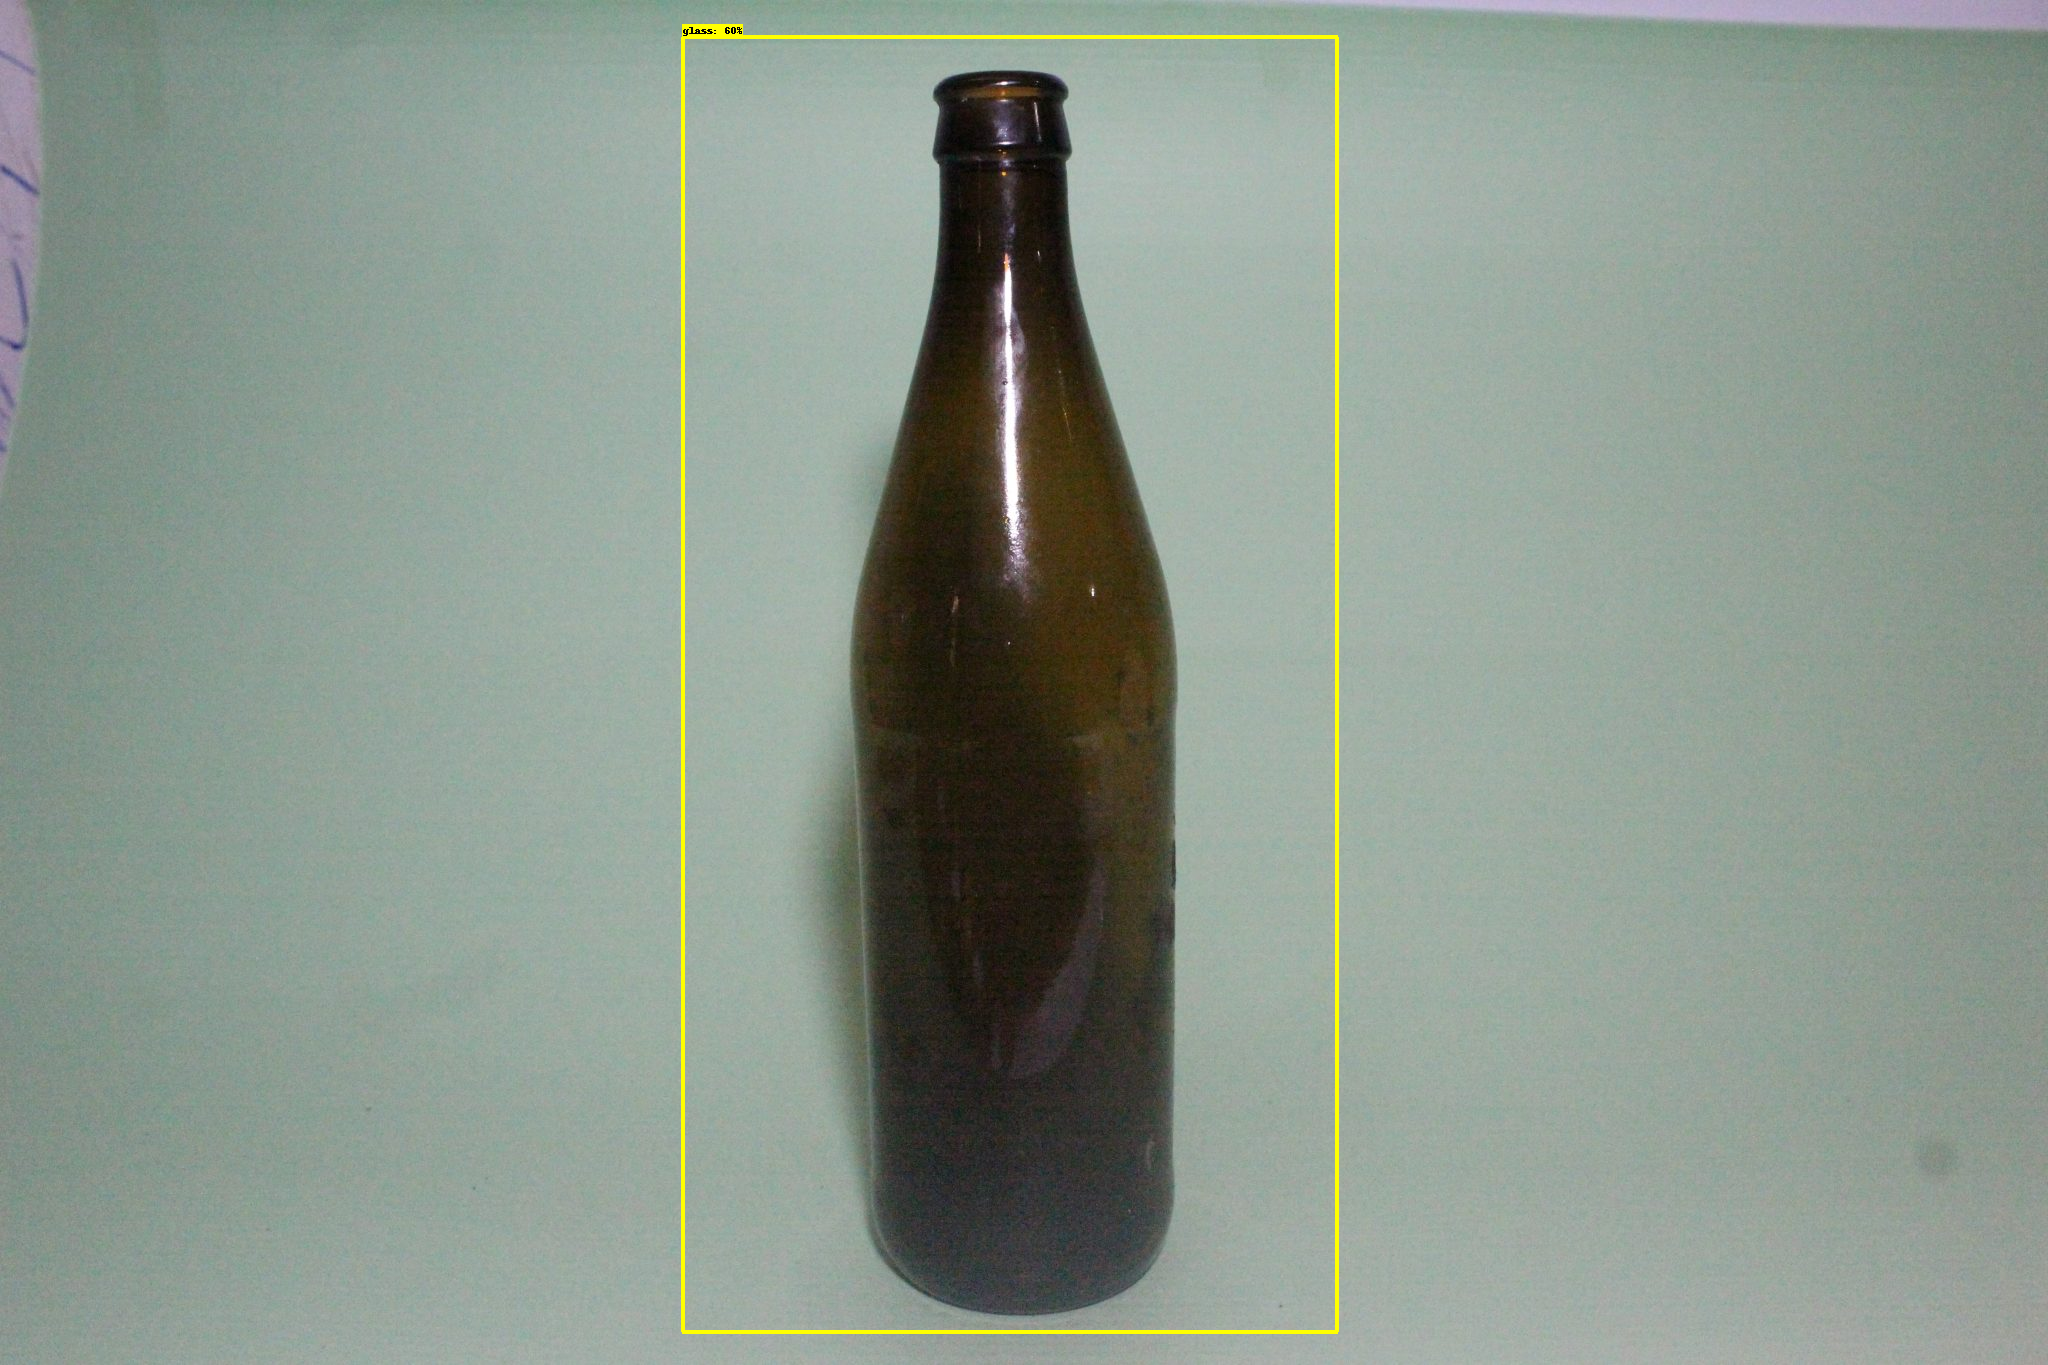

In [46]:
"""
Object Detection From TF2 Saved Model
=====================================
"""

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
import pathlib
import tensorflow as tf
import cv2
import argparse
from google.colab.patches import cv2_imshow

# Enable GPU dynamic memory allocation
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:  
    tf.config.experimental.set_memory_growth(gpu, True)

# Provide Path to Image Directory
IMAGE_PATHS = "/content/IMG_9292-min.jpg"
# Provide Path to Model Directory
PATH_TO_MODEL_DIR = "/content/obj_detection_waste/exported_model/my_model"
# Provide Path to Label Map
PATH_TO_LABELS = "/content/obj_detection_waste/annotations/label_map.pbtxt"
# Provide The Minimum Confidence Threshold
MIN_CONF_THRESH = float(0.60)

# Load The Model
import time
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils

PATH_TO_SAVED_MODEL = PATH_TO_MODEL_DIR + "/saved_model"

print('Loading model...', end='')
start_time = time.time()

# Load saved model and build the detection function
detect_fn = tf.saved_model.load(PATH_TO_SAVED_MODEL)

end_time = time.time()
elapsed_time = end_time - start_time
print('Done! Took {} seconds'.format(elapsed_time))

#Load Label Map Data For Plotting
category_index = label_map_util.create_category_index_from_labelmap(PATH_TO_LABELS,
                                                                    use_display_name=True)

import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')   # Suppress Matplotlib warnings

def load_image_into_numpy_array(path):
    """Load an image from file into a numpy array.

    Puts image into numpy array to feed into tensorflow graph.
    Note that by convention we put it into a numpy array with shape
    (height, width, channels), where channels=3 for RGB.

    Args:
      path: the file path to the image

    Returns:
      uint8 numpy array with shape (img_height, img_width, 3)
    """
    return np.array(Image.open(path))



print('Running inference for {}... '.format(IMAGE_PATHS), end='')

image = cv2.imread(IMAGE_PATHS)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_expanded = np.expand_dims(image_rgb, axis=0)


# The input needs to be a tensor, convert it using `tf.convert_to_tensor`.
input_tensor = tf.convert_to_tensor(image)
# The model expects a batch of images, so add an axis with `tf.newaxis`.
input_tensor = input_tensor[tf.newaxis, ...]

# input_tensor = np.expand_dims(image_np, 0)
detections = detect_fn(input_tensor)


num_detections = int(detections.pop('num_detections'))
detections = {key: value[0, :num_detections].numpy()
                for key, value in detections.items()}
detections['num_detections'] = num_detections

# detection_classes should be ints.
detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

image_with_detections = image.copy()

viz_utils.visualize_boxes_and_labels_on_image_array(
        image_with_detections,
        detections['detection_boxes'],
        detections['detection_classes'],
        detections['detection_scores'],
        category_index,
        use_normalized_coordinates=True,
        max_boxes_to_draw=200,
        min_score_thresh=0.5,
        agnostic_mode=False)


print('Done')
cv2_imshow(image_with_detections)